[following the ibm quantum learning course](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems)

In [1]:
from qiskit.quantum_info import Statevector as SV
from numpy import sqrt

u = SV([ 1 / sqrt(2), 1 / sqrt(2) ])
v = SV([ (1 + 2.0j) / 3, -2 / 3 ])
w = SV([1/3, 2/3])

print('u,v,w are defined now.')

u,v,w are defined now.


In [2]:
import qiskit.quantum_info as qi


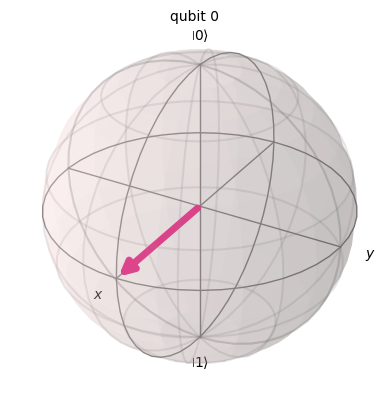

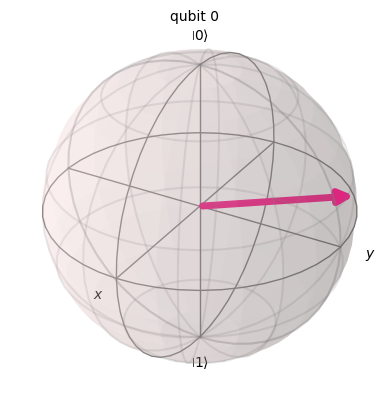

In [3]:
#help(u.draw)
display(u.draw('bloch'))
display(v.draw('bloch'))


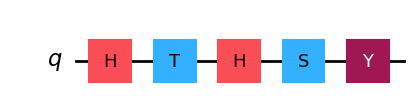

In [4]:
from qiskit import QuantumCircuit

c = QuantumCircuit(1)

c.h(0)
c.t(0)
c.h(0)
c.s(0)
c.y(0)

display(c.draw(output='mpl'))


<IPython.core.display.Latex object>

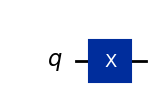

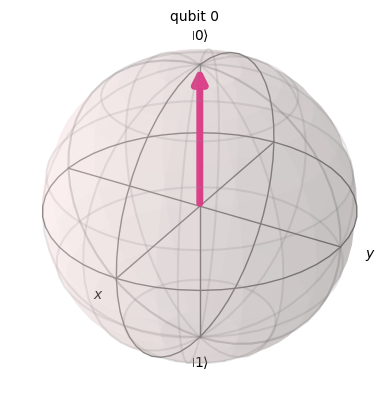

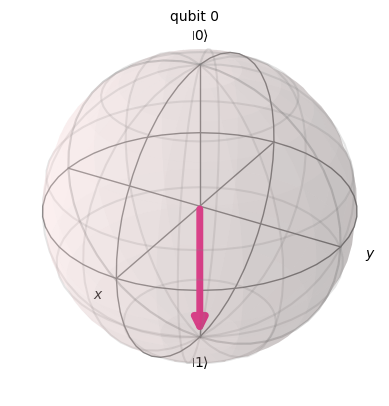

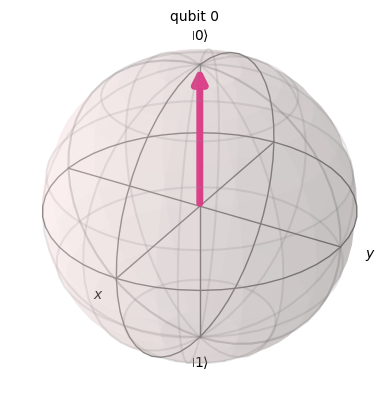

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
from qiskit.quantum_info import Statevector, Operator

#let us negate 0, then negate 1
# we do it with a raw operator and we do it with a qcircuit.
# NOTE this is totally deterministic!

zero = Statevector([1, 0])
qnot = QuantumCircuit(1)
qnot.x(0)

X = Operator([ [ 0, 1], [1, 0] ])

display(X.draw(output='latex'))

#display(zero.draw('bloch'))

# NOTE evolve does not seem to be a mutating call, which is handy
one = zero.evolve(X)
#display(one.draw('bloch'))

display(qnot.draw('mpl'))

also_zero = one.evolve(qnot)

for ds in ('bloch', 'latex'):
    display(zero.draw(ds), one.draw(ds), also_zero.draw(ds))


# Now on to [multiple systems](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems)

## But first this

I want to make 2 actual quantum compuations:
1. I just want to entangle something, anything - so we'll do that with a CNOT and measure
2. I want to summon into existence a truly random number - so a bunch of H and measure wires all in `//`

this is just for my own personal reasons - seems cool and i'd like to say i've done it.

### but

I tend to execute jupyter notebooks pretty capriciously, and i don't want to be re-rendering this thing and accidently eat up all my time on ibm's quantum chips.  So, in this notebook i'll use `AerSimulator` from `qiskit_aer`.

To run for real, replace 
```python
from qiskit_aer import AerSimulator

# ... do some stuff

ans = AerSimulator().run(cir)
stats = ans.get_counts()
display(plot_histogram(stats)

```
with
```python
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# ... do that same stuff


svc = QiskitRuntimeService()
backend = svc.least_busy(operational=True, simulator=False)

sampler = Sampler(backend)
job = sampler.run([eg_cir])
print(f'job id: {job.job_id()}')

ans = job.result()
print(ans)
```

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit_aer import AerSimulator

# define simple circuit to entangle 2 qbits
[ X, Y ] = [ QuantumRegister(1, n) for n in ('X', 'Y') ]
[ A, B ] = [ ClassicalRegister(1, n) for n in ('A', 'B') ]

ent_cir = QuantumCircuit(Y, X, B, A)
ent_cir.h(Y)
ent_cir.cx(Y, X)
for (q,c) in [ (Y, B), (X, A) ]:
    ent_cir.measure(q, c)

display(ent_cir.draw(output='mpl'))
        
ans = AerSimulator().run(ent_cir)
stats = ans.get_counts()
display(plot_histogram(stats))

ModuleNotFoundError: No module named 'qiskit_aer'

In [ ]:
#eg_cir = QuantumCircuit(2)
#eg_cir.measure_all()

#vc = QiskitRuntimeService()
#backend = svc.least_busy(operational=True, simulator=False)

#sampler = Sampler(backend)
#job = sampler.run([eg_cir])
#print(f'job id: {job.job_id()}')

#ans = job.result()
#print(ans)